<a href="https://colab.research.google.com/github/K-Viera/Python/blob/main/DesicionAnalysis/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Tratamiento de Datos
import numpy as np
import pandas as pd
#Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
#Modelado
from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import set_config
import multiprocessing
#Advertencias
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Descarga de Datos
url = ("https://raw.githubusercontent.com/JoaquinAmatRodrigo/"
       "Estadistica-machine-learning-python/master/data/SaratogaHouses.csv")
datos = pd.read_csv(url, sep=",")
datos.head()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes


In [ ]:
# Se renombran las columnas al español
datos.columns = ["precio", "metros_totales", "antiguedad", "precio_terreno",
                 "metros_habitables", "universitarios", "dormitorios", 
                 "chimenea", "banyos", "habitaciones", "calefaccion",
                 "consumo_calefacion", "desague", "vistas_lago",
                 "nueva_construccion", "aire_acondicionado"]
datos.head()

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes


# Análisis Descriptivo

In [ ]:
#Tipo de Columnas
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   precio              1728 non-null   int64  
 1   metros_totales      1728 non-null   float64
 2   antiguedad          1728 non-null   int64  
 3   precio_terreno      1728 non-null   int64  
 4   metros_habitables   1728 non-null   int64  
 5   universitarios      1728 non-null   int64  
 6   dormitorios         1728 non-null   int64  
 7   chimenea            1728 non-null   int64  
 8   banyos              1728 non-null   float64
 9   habitaciones        1728 non-null   int64  
 10  calefaccion         1728 non-null   object 
 11  consumo_calefacion  1728 non-null   object 
 12  desague             1728 non-null   object 
 13  vistas_lago         1728 non-null   object 
 14  nueva_construccion  1728 non-null   object 
 15  aire_acondicionado  1728 non-null   object 
dtypes: flo

In [ ]:
#Número de datos vacíos por variable
datos.isna().sum().sort_values()

precio                0
metros_totales        0
antiguedad            0
precio_terreno        0
metros_habitables     0
universitarios        0
dormitorios           0
chimenea              0
banyos                0
habitaciones          0
calefaccion           0
consumo_calefacion    0
desague               0
vistas_lago           0
nueva_construccion    0
aire_acondicionado    0
dtype: int64

Text(0.5, 0, 'precio')

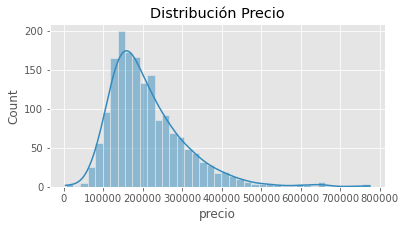

In [ ]:
#Distribución de la variable respuesta
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
sns.histplot(data=datos, x='precio', kde=True,ax=ax)
ax.set_title("Distribución Precio")
ax.set_xlabel('precio')

Text(0.5, 0.98, 'Distribución variables numéricas')

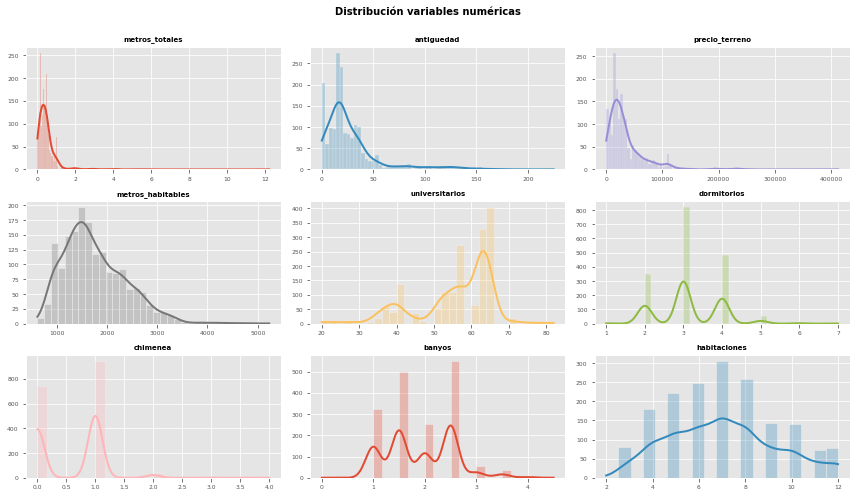

In [ ]:
#Gráficos de distribución para cada variable numérica
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 7))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int64']).columns
columnas_numeric = columnas_numeric.drop('precio')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = datos,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold")

In [ ]:
#Transformación de la variable chimenea
datos.chimenea = datos.chimenea.astype("str")
datos.chimenea.value_counts()

1    942
0    740
2     42
4      2
3      2
Name: chimenea, dtype: int64

In [ ]:
#Visualización de variables cualitativas
datos.select_dtypes(include=['object']).describe()

,chimenea,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
count,1728,1728,1728,1728,1728,1728,1728
unique,5,3,3,3,2,2,2
top,1,hot air,gas,public/commercial,No,No,No
freq,942,1121,1197,1213,1713,1647,1093


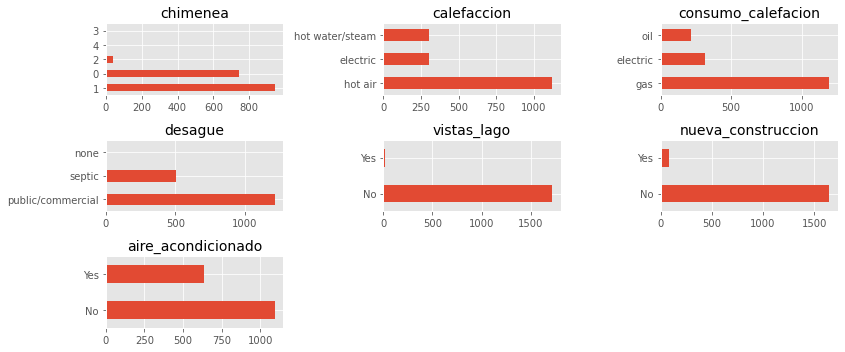

In [ ]:
#Gráficos de frecuencia para variables cualitativas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 5))
axes = axes.flat
columnas_object = datos.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    datos[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 14)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
for i in [7, 8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()

In [ ]:
#Segunda transformación de variable chimenea
dic_replace = {'2': "2_mas",
               '3': "2_mas",
               '4': "2_mas"}

datos['chimenea'] = datos['chimenea'] \
                     .map(dic_replace) \
                     .fillna(datos['chimenea'])
datos.chimenea.value_counts().sort_index()

0        740
1        942
2_mas     46
Name: chimenea, dtype: int64

# División en Entrenamiento y Prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                        datos.drop('precio', axis = 'columns'),
                                        datos['precio'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
print("Partición de entrenamento")
print("-----------------------")
display(y_train.describe())
display(X_train.describe())
display(X_train.describe(include = 'object'))
print(" ")

print("Partición de prueba")
print("-----------------------")
display(y_test.describe())
display(X_test.describe())
display(X_test.describe(include = 'object'))

Partición de entrenamento
-----------------------


count      1382.000000
mean     211436.516643
std       96846.639129
min       10300.000000
25%      145625.000000
50%      190000.000000
75%      255000.000000
max      775000.000000
Name: precio, dtype: float64

,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,banyos,habitaciones
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,0.501331,27.494211,34232.141823,1755.940666,55.439942,3.165702,1.902677,7.073082
std,0.671766,28.212721,35022.662319,621.262215,10.356656,0.825487,0.660053,2.315395
min,0.000000,0.000000,200.000000,616.000000,20.000000,1.000000,0.000000,2.000000
25%,0.170000,13.000000,15100.000000,1302.000000,52.000000,3.000000,1.500000,5.000000
50%,0.370000,19.000000,25000.000000,1650.000000,57.000000,3.000000,2.000000,7.000000
75%,0.540000,33.750000,39200.000000,2127.250000,63.000000,4.000000,2.500000,9.000000
max,8.970000,201.000000,412600.000000,4856.000000,82.000000,7.000000,4.500000,12.000000


,chimenea,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
count,1382,1382,1382,1382,1382,1382,1382
unique,3,3,3,3,2,2,2
top,1,hot air,gas,public/commercial,No,No,No
freq,741,915,972,970,1370,1321,863


 
Partición de prueba
-----------------------


count       346.000000
mean     214084.395954
std      104689.155889
min        5000.000000
25%      139000.000000
50%      180750.000000
75%      271750.000000
max      670000.000000
Name: precio, dtype: float64

,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,banyos,habitaciones
count,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000
mean,0.495751,29.601156,35855.491329,1751.121387,56.078035,3.109827,1.890173,6.916185
std,0.798240,32.884116,35035.761216,615.486848,10.239861,0.783575,0.652368,2.319776
min,0.010000,0.000000,300.000000,792.000000,20.000000,1.000000,1.000000,2.000000
25%,0.160000,13.000000,15100.000000,1296.000000,52.000000,3.000000,1.500000,5.000000
50%,0.370000,19.000000,26700.000000,1608.000000,57.000000,3.000000,2.000000,7.000000
75%,0.557500,34.000000,45950.000000,2181.000000,64.000000,4.000000,2.500000,8.000000
max,12.200000,225.000000,233000.000000,5228.000000,82.000000,6.000000,4.000000,12.000000


,chimenea,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
count,346,346,346,346,346,346,346
unique,3,3,3,3,2,2,2
top,1,hot air,gas,public/commercial,No,No,No
freq,201,206,225,243,343,326,230


# Preprocesado (Codificación y Escalamiento)

In [ ]:
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

In [ ]:
#Variables Numéricas
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

In [ ]:
#Variables Categóricas
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
#Preprocesado
preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

In [ ]:
set_config(display='diagram')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['metros_totales', 'antiguedad',
                                  'precio_terreno', 'metros_habitables',
                                  'universitarios', 'dormitorios', 'banyos',
                                  'habitaciones']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['chimenea', 'calefaccion',
                                  'consumo_calefacion', 'desague',
                                  'vistas_lago', 'nueva_construccion',
                                  'aire_acondicionado'])])

In [ ]:
set_config(display='text')

In [ ]:
#Se aplica el preprocesamiento a las variables
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [ ]:
#Se construye el DataFrame
encoded_cat = preprocessor.named_transformers_['cat']['onehot']\
              .get_feature_names(cat_cols)
labels = np.concatenate([numeric_cols, encoded_cat])
datos_train_prep = preprocessor.transform(X_train)
datos_train_prep = pd.DataFrame(datos_train_prep, columns=labels)
datos_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   metros_totales               1382 non-null   float64
 1   antiguedad                   1382 non-null   float64
 2   precio_terreno               1382 non-null   float64
 3   metros_habitables            1382 non-null   float64
 4   universitarios               1382 non-null   float64
 5   dormitorios                  1382 non-null   float64
 6   banyos                       1382 non-null   float64
 7   habitaciones                 1382 non-null   float64
 8   chimenea_0                   1382 non-null   float64
 9   chimenea_1                   1382 non-null   float64
 10  chimenea_2_mas               1382 non-null   float64
 11  calefaccion_electric         1382 non-null   float64
 12  calefaccion_hot air          1382 non-null   float64
 13  calefaccion_hot wa

# Modelado

In [ ]:
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', MLPRegressor(solver = 'lbfgs', max_iter= 1000))])

In [ ]:
#Búsqueda de hiperparámetros
param_distributions = {
    'modelo__hidden_layer_sizes': [(10), (20), (10, 10)],
    'modelo__alpha': np.logspace(-3, 3, 10),
    'modelo__learning_rate_init': [0.001, 0.01],
}

# Búsqueda por validación cruzada
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 50,
        scoring    = 'neg_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 5, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('numeric',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['metros_totales',
                                                                                'antiguedad',
                                                                                'precio_terreno',
                                                                                'metros_habitables',
                                                                                'universitarios',
                     

In [ ]:
#Resultados
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(10)

,param_modelo__learning_rate_init,param_modelo__hidden_layer_sizes,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
3,0.01,10,2.154435,-3.381261e+09,5.518051e+08,-2.608278e+09,1.682532e+08
30,0.01,10,10.0,-3.401489e+09,7.135982e+08,-2.642381e+09,2.606379e+08
41,0.001,10,10.0,-3.402310e+09,6.457582e+08,-2.762493e+09,1.306836e+08
15,0.001,10,0.001,-3.455722e+09,6.041539e+08,-2.612777e+09,2.250626e+08
31,0.001,10,215.443469,-3.493121e+09,7.997943e+08,-2.588432e+09,2.432637e+08
20,0.001,10,0.021544,-3.494018e+09,7.868635e+08,-2.473274e+09,1.911151e+08
4,0.01,10,46.415888,-3.496343e+09,7.627737e+08,-2.545496e+09,1.915719e+08
25,0.01,10,0.001,-3.499759e+09,9.921367e+08,-2.607371e+09,2.513247e+08
6,0.001,10,0.1,-3.532683e+09,6.852614e+08,-2.495631e+09,2.468703e+08
45,0.001,"(10, 10)",46.415888,-3.560376e+09,8.039364e+08,-2.280954e+09,1.678540e+08


In [ ]:
#Búsqueda de hiperparámetros
param_distributions = {
    'modelo__hidden_layer_sizes': [(10), (20), (10, 10)],
    'modelo__alpha': np.logspace(-3, 3, 10),
    'modelo__learning_rate_init': [0.001, 0.01],
}

# Búsqueda por validación cruzada
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 50,
        scoring    = 'r2',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 5, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('numeric',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['metros_totales',
                                                                                'antiguedad',
                                                                                'precio_terreno',
                                                                                'metros_habitables',
                                                                                'universitarios',
                     

In [ ]:
#Resultados
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(10)

,param_modelo__learning_rate_init,param_modelo__hidden_layer_sizes,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
48,0.01,"(10, 10)",46.415888,0.644380,0.056230,0.736130,0.023898
0,0.001,10,0.464159,0.638455,0.073559,0.726038,0.031149
13,0.01,"(10, 10)",0.1,0.636256,0.043598,0.735710,0.021148
20,0.001,10,0.021544,0.629140,0.046946,0.716070,0.011958
28,0.01,"(10, 10)",0.464159,0.625421,0.058313,0.743302,0.013526
43,0.01,"(10, 10)",215.443469,0.624874,0.079786,0.737341,0.025903
26,0.001,10,0.004642,0.624647,0.057486,0.734214,0.029826
6,0.001,10,0.1,0.618260,0.040423,0.727218,0.026550
44,0.01,10,0.464159,0.616538,0.060058,0.712661,0.031148
46,0.01,10,215.443469,0.615396,0.075475,0.729404,0.031911


In [ ]:
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse = mean_squared_error(
        y_true = y_test,
        y_pred = predicciones,
        squared = False
       )
print('Error de test (rmse): ', rmse)

Error de test (rmse):  67217.09038423291


In [ ]:
resultados = pd.DataFrame()
resultados['índice'] = np.arange(len(y_test))
resultados['y_real'] = y_test
resultados['y_predicha'] = predicciones
resultados['delta'] = resultados.y_real - resultados.y_predicha
resultados.head()

,índice,y_real,y_predicha,delta
0,0,NaN,116913.914572,NaN
1,1,NaN,159669.413974,NaN
2,2,NaN,161857.348570,NaN
3,3,NaN,186447.084640,NaN
4,4,86060.0,250576.945770,-164516.94577


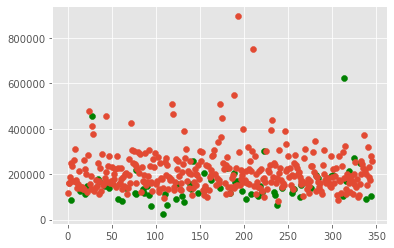

In [ ]:
plt.scatter(resultados.índice, resultados.y_real, color = "green")
plt.scatter(resultados.índice, resultados.y_predicha)

Text(0.5, 0, 'precio')

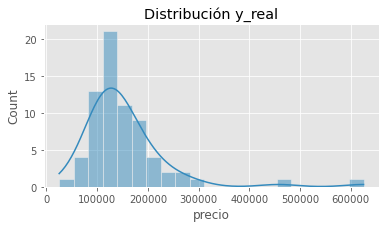

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
sns.histplot(data=resultados.y_real, kde=True,ax=ax)
ax.set_title("Distribución y_real")
ax.set_xlabel('precio')

Text(0.5, 0, 'precio')

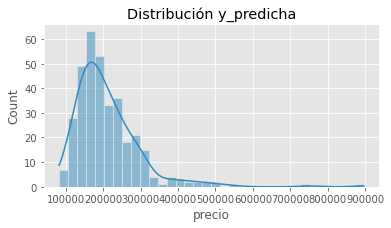

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
sns.histplot(data=resultados.y_predicha, kde=True,ax=ax)
ax.set_title("Distribución y_predicha")
ax.set_xlabel('precio')